In [102]:
from bokeh.io import output_notebook
from bokeh.models import CustomJS, Spinner, ColumnDataSource, Arrow
from bokeh.plotting import figure, show
from bokeh.layouts import column

In [103]:
output_notebook()

Loading BokehJS ...

In [104]:
source = ColumnDataSource(data=dict(x=[1,0,1], y=[0,1,1]))

plot = figure(width=400, height=400)
plot.circle('x', 'y', source=source, line_width=3, line_alpha=0.6)

spinner1 = Spinner(value=1, step = 1, width=80, title="Escalar 1")
spinner2 = Spinner(value=1, step = 1, width=80, title="Escalar 2")

update_tamanho = CustomJS(args=dict(source=source, spinner1=spinner1, spinner2=spinner2), code="""
    source.data['x'] = [spinner1.value, 0, spinner1.value]
    source.data['y'] = [0, spinner2.value, spinner2.value]
    source.change.emit()
""")

arrowSource = ColumnDataSource(data=dict(x_end = [1], y_end = [1]))
plot.add_layout(Arrow(x_start = 0, x_end = spinner1.value, y_start = 0, y_end = 0 ))
plot.add_layout(Arrow(x_start = 0, x_end = 0, y_start = 0, y_end = spinner2.value))
plot.add_layout(Arrow(x_start = 0, x_end = spinner1.value, y_start = 0, y_end = spinner2.value))

update_arrow = CustomJS(args=dict(source=arrowSource, spinner1=spinner1, spinner2=spinner2), code="""
    arrowSource.data['x_end'] = [spinner1.value]
    arrowSource.data['y_end'] = [spinner2.value]
    arrowSource.change.emit()
""")

spinner2.js_on_change('value', update_tamanho)
spinner1.js_on_change('value', update_tamanho)
spinner2.js_on_change('value', update_arrow)
spinner1.js_on_change('value', update_arrow)

show(column(spinner1, spinner2, plot))

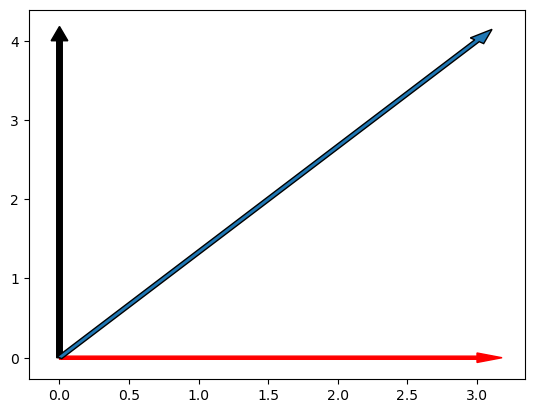

In [105]:
import matplotlib.pyplot as plt

input1 = input("Escalar 1: ")
input2 = input("Escalar 3: ")
escalar1 = float(input1)
escalar2 = float(input2)
plt.arrow(0, 0, escalar1, 0, width = 0.04, color = 'red')
plt.arrow(0, 0, 0, escalar2, width = 0.04, color = 'black')
plt.arrow(0, 0, escalar1, escalar2, width = 0.04)
plt.show()
